In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import math
from __future__ import division
import warnings
warnings.filterwarnings("ignore")

# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)

sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
np.version.full_version

'1.19.5'

## Data
Here we create two samples of different sample size. We want to know if the sample means are significantly different.

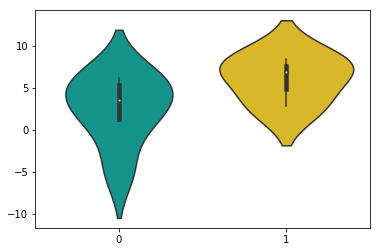

In [3]:
sample_a = np.array([4.9, 6.2, 1.0, -4.8, 2.2, 5.4])
sample_b = np.array([2.8, 6.9, 8.4])

sns.violinplot(data = [sample_a, sample_b], names=['sample a', 'sample b'])
plt.show()

In [4]:
# Find the mean for both samples
xbar_a = sample_a.mean()
xbar_b = sample_b.mean()

xbar_a, xbar_b

(2.483333333333334, 6.033333333333334)

## Hypothesis
Is there a statistical significant difference between the two sample means at an alpha level of .05?

|Hypothesis||$\alpha = .05$|
|---:|:---:|---|:---|
|$H_0:$|$\mu_{a} = \mu_{a}$|There is no significant difference between a and b|
|$H_a:$|$\mu_{b} \neq \mu_{b}$|There is a significant difference between a and b|

## Sum of Squares
First we need to find the sum of squares from both samples. We do this by summing all the differences from the mean in the sample, then square them. The following formula applies:

$$SS=\sum(x_i-\bar{x})^2$$

In [5]:
# Find the sum of squares for both samples
ss_a = np.sum((sample_a - xbar_a) ** 2)
ss_b = np.sum((sample_b - xbar_b) ** 2)

ss_a, ss_b

(83.48833333333333, 16.80666666666667)

## Pooled Variance
Since the sample size between a and b is different, we can use the pooled variance to account for these difference in calculations. The following formula applies:

$$S_p^2=\frac{SS_a+SS_b}{df_a + df_b}$$

In [6]:
# Calculate the Degrees of Freedom for both samples
n_a = len(sample_a)
n_b = len(sample_b)
dof_a = n_a - 1
dof_b = n_b - 1

dof_a, dof_b

(5, 2)

In [7]:
# Calculate the Pooled Variance
Sp2 = (ss_a + ss_b) / (dof_a + dof_b)
Sp2

14.327857142857143

## Standard Error
Now we can calculate the Standard Error by using the Pooled Variance instead of the individual variance. The following formula applies:

$$sem=\sqrt{\frac{S_p^2}{n_a}+\frac{S_p^2}{n_b}}$$

In [8]:
# Calculate the Standard Error of the Mean
sem = np.sqrt(Sp2 / n_a + Sp2 / n_b)
sem

2.676551619421634

## The t-Statistic
The t-statistic for the mean difference between these samples is calculated as follows:

$$t=\frac{(\bar{x}_a-\bar{x}_b)-(\mu_a-\mu_b)}{sem}$$

In [9]:
# Calculate the t-statistic
observed_diff = xbar_a - xbar_b
expected_diff = 0  # we expect no difference between population means

t = (observed_diff - expected_diff) / sem
t

-1.3263334711127697

## The t-critical value
To test our hypothesis, we need to get the t-critical value.

In [10]:
alpha = .05
t_critical = np.abs(stats.t.ppf(alpha / 2, dof_a + dof_b))  # two sided
t_critical

2.3646242510103

## Hypothesis testing

In [11]:
# We compare our t-statistic against the t-criticalk value to test the 
# acceptance of the alternative hypothesis
-t_critical > t or t > t_critical

False

Since the t-statistic lies between the t-critical values of alpha, we fail to reject the null hypothesis. The mean difference from both samples is probably due to chance and therefore not statistical significant.

## Using scipy.stats or statsmodels

In [12]:
# A quicker way to get these results is to call scipy stats
# ttest_ind on both samples
t_statistic, p = stats.ttest_ind(sample_a, sample_b)
t_statistic, p

(-1.3263334711127697, 0.22636455334070857)

In [13]:
# Another alternative is using Statsmodels
t_statistic, p, dof = sm.stats.ttest_ind(sample_a, sample_b, 
                   alternative='two-sided', usevar='pooled')
t_statistic, p, dof

(-1.3263334711127697, 0.22636455334070857, 7.0)